# Example with Sensitivity Analysis

Basic: 
```python
method_name="add_unobserved_common_cause"
```

In [62]:
# Imports
import pandas as pd
from dowhy import CausalModel
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx

warnings.filterwarnings("ignore", category=FutureWarning)

## Trying out on [Balke-Pearl](https://drive.google.com/drive/folders/1mLHLrXJI1-z0eMy68Bkljw4gdDImSm0q) example

### Data and Modeling

In [2]:
df = pd.read_csv("../../data/balke_pearl.csv")
df.head()

,Z,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


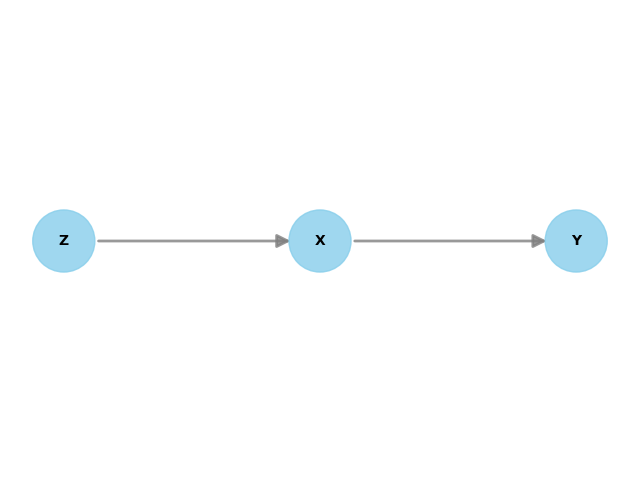

In [3]:
# Step 1: Model
model = CausalModel(
    data=df,
    treatment='X',
    outcome='Y',
    instruments=['Z']
)

model.view_model()

### Identifying

In [4]:
# Step 2: Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation

In [5]:
# Step 3: Estimate
# Choose the first estimand: using the backdoor criterion
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    test_significance=True,
    confidence_intervals=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

## Realized estimand
b: Y~X
Target units: ate

## Estimate
Mean value: 0.23544231631810425
p-value: [6.2290416e-14]
95.0% confidence interval: [[0.17474776 0.29613687]]



### Refutation

#### Linear

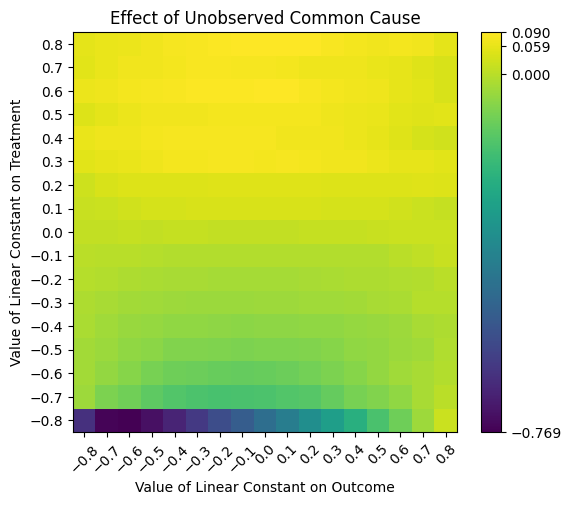

In [44]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(-0.8, 0.9, 0.1).round(1)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

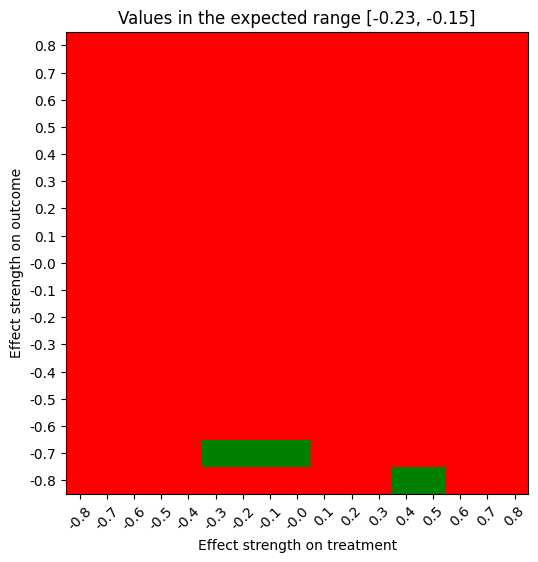

In [59]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

#### Binary Flip

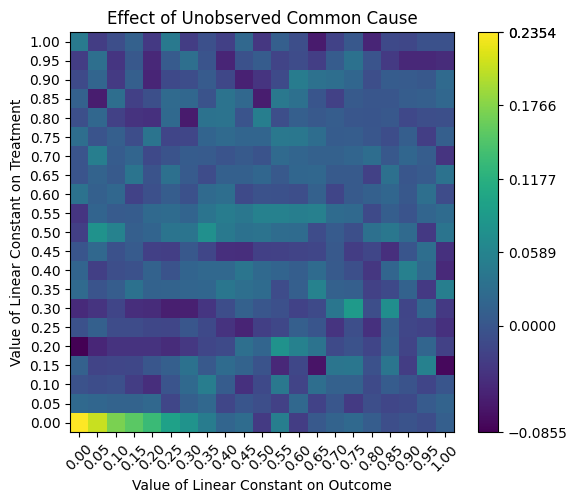

In [60]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(0, 1.05, 0.05).round(2)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

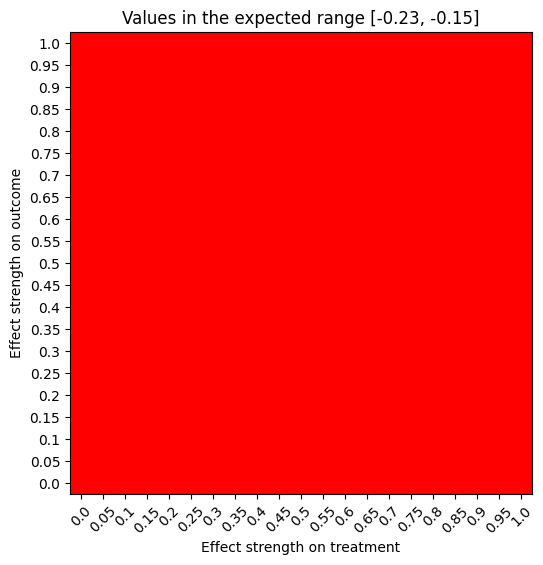

In [61]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

## Trying out a more complex example example

### Data and Modeling

In [ ]:
# Graphical representation of the causal model
graph = nx.DiGraph(
    """
    
    """
)

In [ ]:
# Data
df = pd.read_csv("../../data/balke_pearl.csv")
df.head()

,Z,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


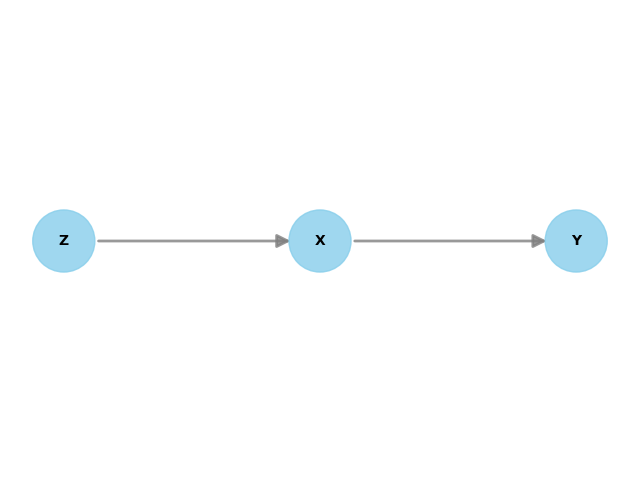

In [ ]:
# Step 1: Model
model = CausalModel(
    data=df,
    treatment='X',
    outcome='Y',
    instruments=['Z']
)

model.view_model()

### Identifying

In [ ]:
# Step 2: Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation

In [ ]:
# Step 3: Estimate
# Choose the first estimand: using the backdoor criterion
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    test_significance=True,
    confidence_intervals=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

## Realized estimand
b: Y~X
Target units: ate

## Estimate
Mean value: 0.23544231631810425
p-value: [6.2290416e-14]
95.0% confidence interval: [[0.17474776 0.29613687]]



### Refutation

#### Linear

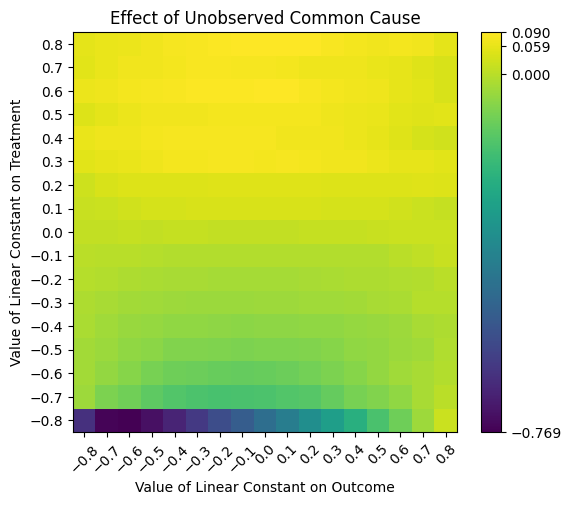

In [ ]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(-0.8, 0.9, 0.1).round(1)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

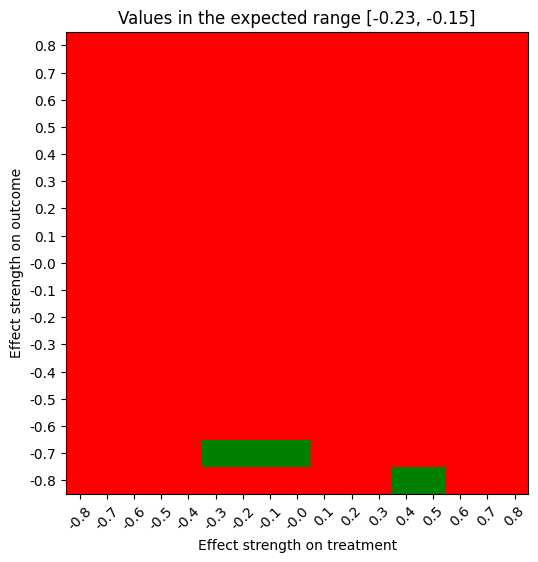

In [ ]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

#### Binary Flip

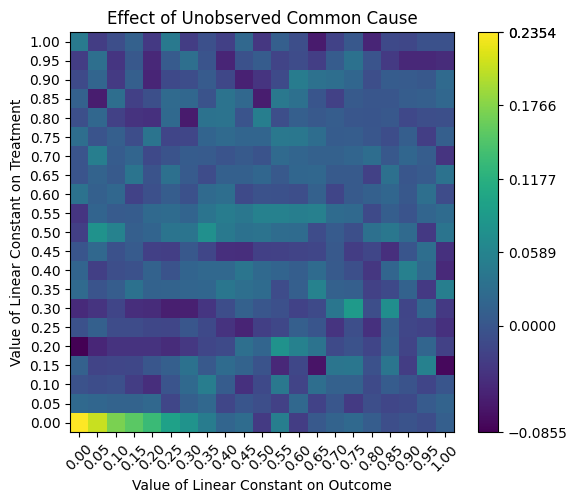

In [ ]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(0, 1.05, 0.05).round(2)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

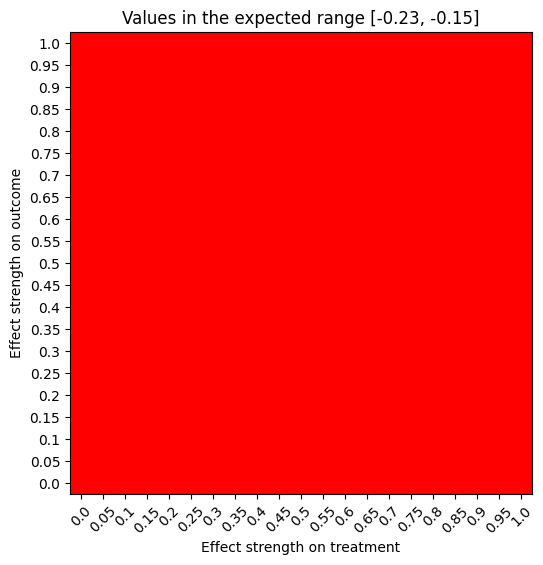

In [ ]:
# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
matrix[values_in_range] = 1
matrix[matrix != 1] = 0
matrix = matrix[::-1]

# Create a binary heatmap
plt.figure(figsize=(6, 6))
plt.imshow(matrix, cmap=ListedColormap(
    ['red', 'green']), interpolation='nearest')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(strength_list)),
           labels=strength_list, rotation=45)
plt.yticks(ticks=np.arange(len(strength_list)),
           labels=strength_list[::-1])

# Set title
plt.title('Values in the expected range [-0.23, -0.15]')
plt.xlabel('Effect strength on treatment')
plt.ylabel('Effect strength on outcome')

# Show the plot
plt.show()

# Perfoming sensitivity analysis on the following model:

![title](<exampleSenA.png>)

## Creating the model

### Setting the DAG

In [11]:
from dowhy import CausalModel
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

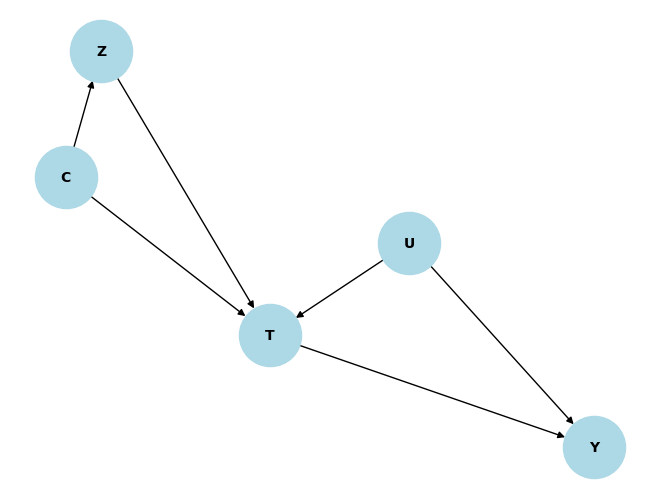

In [12]:
causal_graph = nx.DiGraph([
    ('C', 'Z'),
    ('C', 'T'),
    ('Z', 'T'),
    ('T', 'Y'),
    ('U', 'Y'),
    ('U', 'T')
]
)

nx.draw(causal_graph, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()

### Generating Data

In [13]:
def generate_exact_data():
    # Define all possible combinations of U, C, Z, T, Y
    combinations = []
    for U in [0, 1]:
        for C in [0, 1]:
            # Compute P(Z=1|C)
            P_Z_given_C = 0.1 + 0.8 * C
            for Z in [0, 1]:
                # Compute P(Z|C)
                P_Z = P_Z_given_C if Z == 1 else 1 - P_Z_given_C
                
                # Compute P(T=1|U,C,Z)
                P_T_given_UCZ = 0.1 + 0.2 * U + 0.3 * C + 0.4 * Z
                P_T_given_UCZ = np.clip(P_T_given_UCZ, 0, 1)
                for T in [0, 1]:
                    # Compute P(T|U,C,Z)
                    P_T = P_T_given_UCZ if T == 1 else 1 - P_T_given_UCZ
                    
                    # Compute P(Y=1|T,U)
                    P_Y_given_TU = 0.1 + 0.6 * T + 0.3 * U
                    P_Y_given_TU = np.clip(P_Y_given_TU, 0, 1)
                    for Y in [0, 1]:
                        # Compute P(Y|T,U)
                        P_Y = P_Y_given_TU if Y == 1 else 1 - P_Y_given_TU
                        
                        # Compute joint probability
                        # P(U) = 0.5, P(C) = 0.5
                        P_U = 0.5
                        P_C = 0.5
                        
                        joint_prob = P_U * P_C * P_Z * P_T * P_Y
                        
                        combinations.append({
                            'U': U,
                            'C': C,
                            'Z': Z,
                            'T': T,
                            'Y': Y,
                            'probability': joint_prob
                        })
    
    # Create a DataFrame
    df = pd.DataFrame(combinations)
    
    # Normalize probabilities to sum to 1 (should already sum to 1, but ensure due to rounding errors)
    total_prob = df['probability'].sum()
    df['probability'] = df['probability'] / total_prob
    
    # Determine the number of samples (choose a large enough N)
    N = 100000  # Total number of samples
    df['frequency'] = (df['probability'] * N).round().astype(int)
    
    # Adjust frequencies to ensure total samples sum to N
    frequency_adjustment = N - df['frequency'].sum()
    if frequency_adjustment != 0:
        # Adjust the frequencies of the combination with the highest probability
        max_prob_index = df['probability'].idxmax()
        df.at[max_prob_index, 'frequency'] += frequency_adjustment
    
    # Generate the dataset
    data = pd.DataFrame({
        'U': np.repeat(df['U'], df['frequency']),
        'C': np.repeat(df['C'], df['frequency']),
        'Z': np.repeat(df['Z'], df['frequency']),
        'T': np.repeat(df['T'], df['frequency']),
        'Y': np.repeat(df['Y'], df['frequency']),
    })
    
    # Shuffle the dataset
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return data

# Generate the data
data = generate_exact_data()

# Display the first few rows
print(data.head())

# Check that empirical distributions match theoretical probabilities
def check_distributions(data):
    # Marginal distributions
    print("\nEmpirical P(U):")
    print(data['U'].value_counts(normalize=True))
    print("\nEmpirical P(C):")
    print(data['C'].value_counts(normalize=True))
    
    # Conditional distributions
    print("\nEmpirical P(Z=1|C):")
    print(data.groupby('C')['Z'].mean())
    
    print("\nEmpirical P(T=1|U,C,Z):")
    t_probs = data.groupby(['U', 'C', 'Z'])['T'].mean().reset_index()
    print(t_probs)
    
    print("\nEmpirical P(Y=1|T,U):")
    y_probs = data.groupby(['T', 'U'])['Y'].mean().reset_index()
    print(y_probs)

# Run the check
check_distributions(data)


   U  C  Z  T  Y
0  1  1  0  0  1
1  1  1  1  1  1
2  0  0  0  0  1
3  1  1  0  1  1
4  1  1  1  1  1

Empirical P(U):
U
1    0.5
0    0.5
Name: proportion, dtype: float64

Empirical P(C):
C
1    0.5
0    0.5
Name: proportion, dtype: float64

Empirical P(Z=1|C):
C
0    0.1
1    0.9
Name: Z, dtype: float64

Empirical P(T=1|U,C,Z):
   U  C  Z    T
0  0  0  0  0.1
1  0  0  1  0.5
2  0  1  0  0.4
3  0  1  1  0.8
4  1  0  0  0.3
5  1  0  1  0.7
6  1  1  0  0.6
7  1  1  1  1.0

Empirical P(Y=1|T,U):
   T  U    Y
0  0  0  0.1
1  0  1  0.4
2  1  0  0.7
3  1  1  1.0


Since we want $U$ to be unobserved and only accounted for when we are performing the sensitivity analysis, we're going to drop it from the DataFrame.

In [14]:
data.drop(columns=['U'], inplace=True)
data.head()

,C,Z,T,Y
0,1,0,0,1
1,1,1,1,1
2,0,0,0,1
3,1,0,1,1
4,1,1,1,1


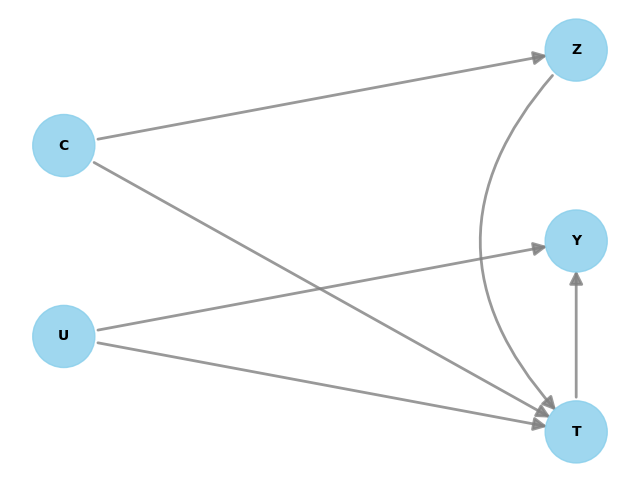

In [15]:
model = CausalModel(
    data=data,
    treatment='T',
    outcome='Y',
    graph=causal_graph
)

model.view_model()

## Identification

In [16]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                         -1⎤
 ⎢   d       ⎛   d        ⎞  ⎥
E⎢───────(Y)⋅⎜───────([T])⎟  ⎥
 ⎣d[C  Z]    ⎝d[C  Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{C,Z})
Estimand assumption 2, Exclusion: If we remove {C,Z}→{T}, then ¬({C,Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



We found the instrumental variable Z in the model, so we will use the IV method for the estimand.

In [17]:
estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", method_params={'iv_instrument_name': 'Z'})

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: iv
Estimand expression:
 ⎡                         -1⎤
 ⎢   d       ⎛   d        ⎞  ⎥
E⎢───────(Y)⋅⎜───────([T])⎟  ⎥
 ⎣d[C  Z]    ⎝d[C  Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{C,Z})
Estimand assumption 2, Exclusion: If we remove {C,Z}→{T}, then ¬({C,Z}→Y)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: EstimandType.NONPARAMETRIC_ATE
Estimand expression:
 ⎡d    ⎤
E⎢──(Y)⎥
 ⎣dZ   ⎦
────────
 ⎡d    ⎤
E⎢──(T)⎥
 ⎣dZ   ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{C,Z})
Estimand assumption 2, Exclusion: If we remove {C,Z}→{T}, then ¬({C,Z}→Y)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment ['T'] is affected in the same way by common causes of ['T'] and ['Y']
Estimand assumption 4, outcome_effect_homogeneity: Each unit's outcome ['Y'] is affected in the same way by com

The expected ACE was $0.6$, since $P(Y=1|T,U) = 0.1 + 0.6T + 0.3U$, which means the causal effect of T on Y is $0.6$.

We got the correct result because DoWhy was able to bypass the fact that we had an unobserved confounder by using the IV method.

## Refutation

In [18]:
ref = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute")
print(ref)

Refute: Use a Placebo Treatment
Estimated effect:0.6
New effect:47.73765855346712
p value:0.98



In [19]:
ref = model.refute_estimate(identified_estimand,
                          estimate,
                          method_name="dummy_outcome_refuter"
                          )
print(ref[0])

Refute: Use a Dummy Outcome
Estimated effect:0
New effect:-0.0003016858889635991
p value:0.94



In [20]:
res_subset=model.refute_estimate(identified_estimand, estimate,
       method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9)
print(res_subset)

Refuting Estimates: 100%|██████████| 100/100 [00:01<00:00, 82.34it/s]

Refute: Use a subset of data
Estimated effect:0.6
New effect:0.5998518130129018
p value:0.92



In [21]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                    confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                   effect_strength_on_treatment=0.2, effect_strength_on_outcome=0.3)
print(res_unobserved)

Refute: Add an Unobserved Common Cause
Estimated effect:0.6
New effect:0.6039237290612491



Since we were able to obtain the exact ACE, the estimate is able to pass every refutation method. In a case where we know that there's a confounder in our model but can't observe it and there are no IVs, the results would probably be different, especially for the "add_unobserved_common_cause" method, which would show the model is too sensitive.

# Performing sensitivity analysis when the unconfoundness assumption is violated

In [22]:
from dowhy import CausalModel
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

## Creating the model

### Setting the DAG

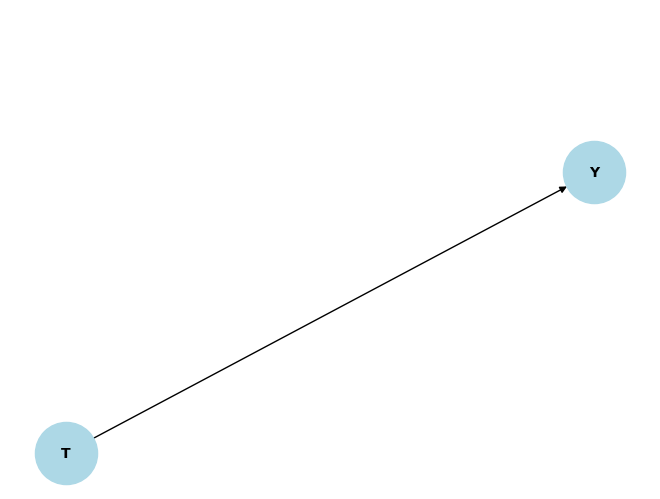

In [23]:
causal_graph = nx.DiGraph([
    ('T', 'Y')
])

nx.draw(causal_graph, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')

In this example, we won't represent a confounder $U$, but it exists and has a significant effect on both the treatment $T$ and the outcome $Y$, we just can't observe it.

### Generating data

In [24]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 1000

# Step 1: Generate exogenous variable U (binary) with P(U=1) = 0.6
P_U_1 = 0.6
U = np.random.choice([0, 1], size=n_samples, p=[1 - P_U_1, P_U_1])

# Step 2: Generate endogenous variable T (binary) influenced by U
# T is influenced by U such that P(T=1 | U=1) = 0.8 and P(T=1 | U=0) = 0.3
T = np.array([np.random.choice([0, 1], p=[0.2, 0.8]) if u == 1 else np.random.choice([0, 1], p=[0.7, 0.3]) for u in U])

# Step 3: Define the deterministic function for Y based on T and U
# Y is influenced by both U and T using an OR operation to avoid always being zero
Y = U | T

# Create a DataFrame to store the generated data
data = pd.DataFrame({'U': U, 'T': T, 'Y': Y})

# Display the first few rows of the generated data
data.head()

,U,T,Y
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,1,1


Since we want $U$ to be unobserved and only accounted for when we are performing the sensitivity analysis, we're going to drop it from the DataFrame.

In [25]:
data.drop(columns=['U'], inplace=True)
data.head()

,T,Y
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1


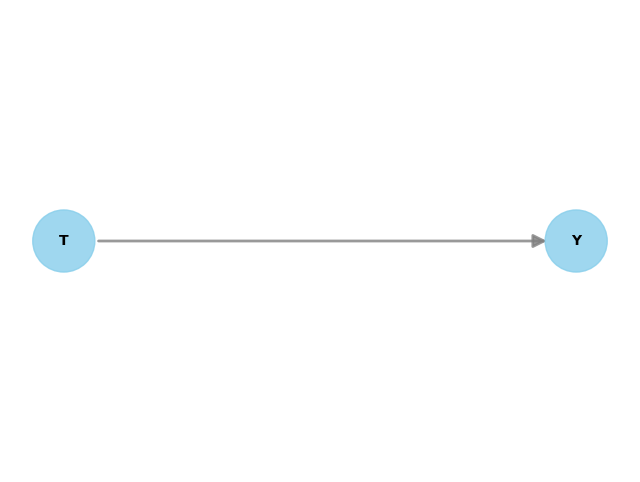

In [26]:
model = CausalModel(
    data=data,
    treatment='T',
    outcome='Y',
    graph=causal_graph
)

model.view_model()

## Identification

In [27]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[T]      
Estimand assumption 1, Unconfoundedness: If U→{T} and U→Y then P(Y|T,,U) = P(Y|T,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Since $U$ wasn't included in both the DAG and the data, DoWhy assumes unconfoundness, which is false in this case.

## Estimation

In [28]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[T]      
Estimand assumption 1, Unconfoundedness: If U→{T} and U→Y then P(Y|T,,U) = P(Y|T,)

## Realized estimand
b: Y~T
Target units: ate

## Estimate
Mean value: 0.7160493827160472



The value we were looking for was $0.4$. Seeing that there's a backdoor path, we should ajust to it:

$$ E[Y \mid do(T = t)] = \sum_{u} E[Y \mid T = t, U = u] \cdot P(U = u) $$

Calculating $E[Y \mid do(T = 1)]$:

1. For $U = 1$:
* $E[Y \mid T = 1, U = 1] = Y(U=1,T=1) = 1 \lor 1 = 1$
* $P(U=1) = 0.6$

2. For $U=0$:

* $E[Y \mid T = 1, U = 0] = Y(U=0,T=1) = 0 \lor 1 = 1$
* $P(U=0) = 0.4$

3. Computing $E[Y \mid do(T = 1)]$:
$$ E[Y \mid do(T = 1)] = (0.6) \cdot 1 + (0.4) \cdot 1 = 1.0 $$

Calculating $E[Y \mid do(T = 0)]$:

1. For $U = 1$:
* $E[Y \mid T = 0, U = 1] = Y(U=1,T=0) = 1 \lor 0 = 1$
* $P(U=1) = 0.6$

2. For $U=0$:

* $E[Y \mid T = 0, U = 0] = Y(U=0,T=0) = 0 \lor 0 = 0$
* $P(U=0) = 0.4$

3. Computing $E[Y \mid do(T = 0)]$:
$$ E[Y \mid do(T = 0)] = (0.6) \cdot 1 + (0.4) \cdot 0 = 0.6 $$

Finally, calculating the ACE:

$$ ACE = E[Y \mid do(T = 1)] - E[Y \mid do(T = 0)] = 1 - 0.6 = 0.4 $$






## Refutation

In [33]:
ref = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(ref)

Refute: Use a Placebo Treatment
Estimated effect:0.7160493827160472
New effect:0.002942905822216937
p value:0.8600000000000001



In [30]:
ref = model.refute_estimate(identified_estimand,
                          estimate,
                          method_name="dummy_outcome_refuter"
                          )
print(ref[0])

Refute: Use a Dummy Outcome
Estimated effect:0
New effect:0.014137016977285184
p value:0.8



In [31]:
res_subset=model.refute_estimate(identified_estimand, estimate,
       method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9)
print(res_subset)

Refuting Estimates: 100%|██████████| 100/100 [00:00<00:00, 167.51it/s]

Refute: Use a subset of data
Estimated effect:0.7160493827160472
New effect:0.7151782366614771
p value:0.8



In [43]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                    confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                   effect_strength_on_treatment=0.5, effect_strength_on_outcome=0.7)
print(res_unobserved)

Refute: Add an Unobserved Common Cause
Estimated effect:0.7160493827160472
New effect:-0.3274154485357489



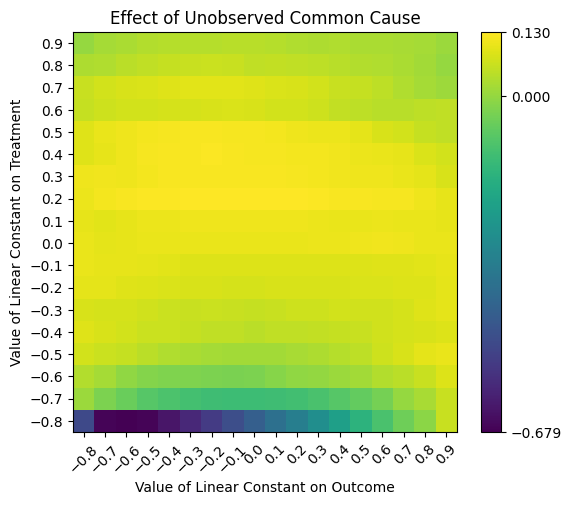

Refute: Add an Unobserved Common Cause
Estimated effect:0.7160493827160472
New effect:(np.float64(-0.6791855820114591), np.float64(0.13006649776763002))



In [42]:
strength_list = np.arange(-0.8, 1.0, 0.1).round(1)

res_unobserved_range=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=strength_list, effect_strength_on_outcome=strength_list)
print(res_unobserved_range)

Considering the original estimated effect was based on a false assumption, it was expected that the model would turn out to be sensitive and change its estimate significantly when we added an unobserved common cause.